In [5]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from scipy.stats import pearsonr
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import itertools

# Use ggplot style for visulizations
plt.style.use('ggplot')

In [6]:
# Import Syph data
data = pd.read_excel('HTLV1.xlsx', index=False)

# Read the required columns
data = data[['sample_id', 'data_1', 'co_1', 'data_2', 'co_2']]

# Set new column names
data.columns = [['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp']]

# Change negative and positive values to 0 and 1 respectively 
data = data.replace('POSITIVE', 1)
data = data.replace('Negative', 0)
data = data.replace('EQUIVOCAL', 1)



# Print columns and head
print(data.columns)
data.head()

Index(['id', 'evo_data', 'evo_resp', 'rmp_data', 'rmp_resp'], dtype='object')


,id,evo_data,evo_resp,rmp_data,rmp_resp
0,18V0003736,0.13,0,0.11,0
1,18V0003895,0.12,0,0.10,0
2,18V0003901,0.16,0,0.11,0
3,18V0004030,0.15,0,0.11,0
4,18V0004031,0.13,0,0.11,0


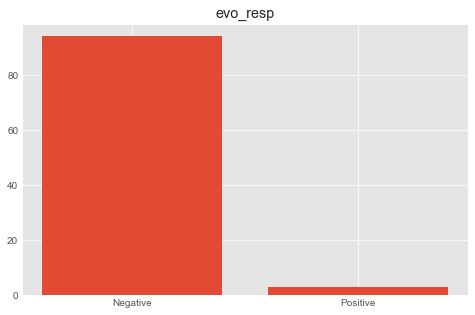

0    94
1     3
Name: evo_resp, dtype: int64

In [8]:
x = np.arange(2)
y =data.evo_resp.value_counts()


from pylab import rcParams
rcParams['figure.figsize'] = 8,5
plt.bar(x, y)
plt.xticks(x, ('Negative', 'Positive'))
plt.title('evo_resp')
plt.show()
y

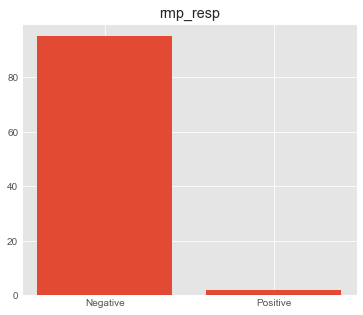

0    95
1     2
Name: rmp_resp, dtype: int64

In [9]:
x = np.arange(2)
y =data.rmp_resp.value_counts()


from pylab import rcParams
rcParams['figure.figsize'] = 6,5
plt.bar(x, y)
plt.xticks(x, ('Negative', 'Positive'))
plt.title('rmp_resp')
plt.show()
y

In [10]:
# Describe the 5 point statistics of the dataset
print(data.evo_data.describe())

count    97.000000
mean      0.201340
std       0.620981
min       0.100000
25%       0.110000
50%       0.120000
75%       0.130000
max       6.060000
Name: evo_data, dtype: float64


In [11]:
data.rmp_data.describe()

count    97.000000
mean      0.158763
std       0.363869
min       0.060000
25%       0.110000
50%       0.110000
75%       0.130000
max       3.600000
Name: rmp_data, dtype: float64

In [7]:
# Describe the 5 point statistics of the dataset
data.describe()

,evo_data,evo_resp,rmp_data,rmp_resp
count,97.000000,97.000000,97.000000,97.000000
mean,0.201340,0.030928,0.158763,0.020619
std,0.620981,0.174022,0.363869,0.142842
min,0.100000,0.000000,0.060000,0.000000
25%,0.110000,0.000000,0.110000,0.000000
50%,0.120000,0.000000,0.110000,0.000000
75%,0.130000,0.000000,0.130000,0.000000
max,6.060000,1.000000,3.600000,1.000000


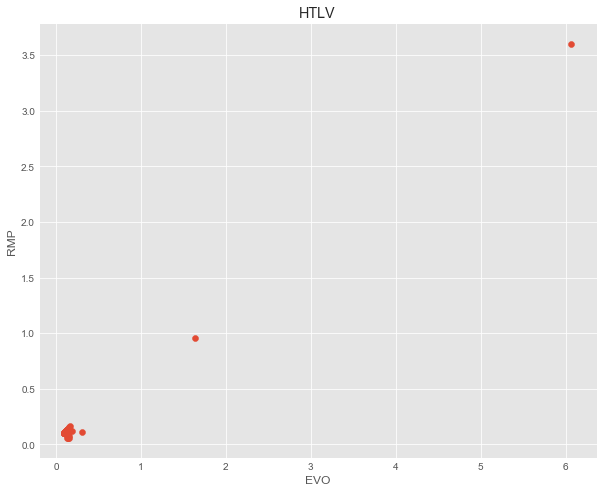

In [13]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 10,8
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('HTLV')
plt.show()

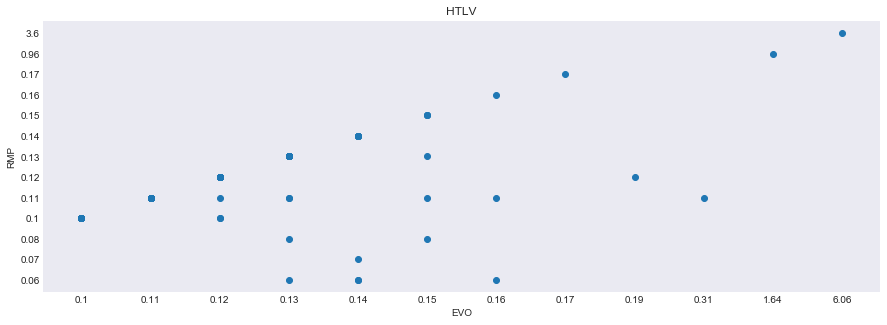

In [9]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.scatter(data.evo_data, data.rmp_data)
plt.xlabel('EVO')
plt.ylabel('RMP')
plt.title('HTLV')
plt.show()

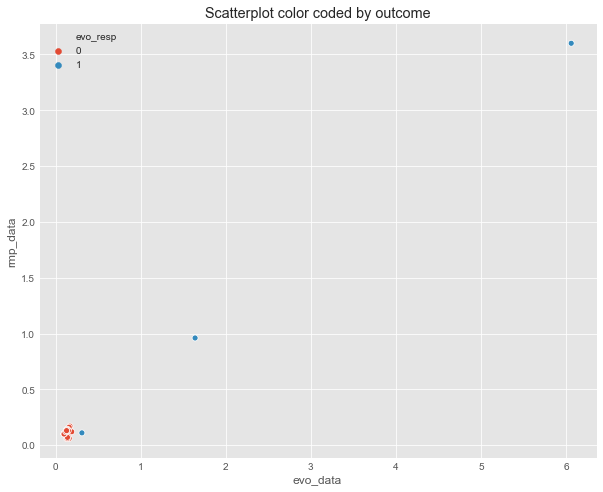

In [14]:
# !conda remove seaborn
# import seaborn as sns
sns.scatterplot(x='evo_data', y='rmp_data', hue='evo_resp', data=data, legend='full' )
plt.title('Scatterplot color coded by outcome')
# plt.legend(data.rmp_data, ['negative', 'positive'])
plt.show()

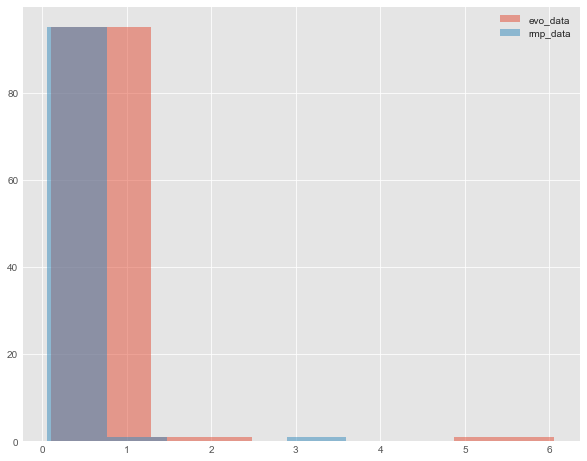

In [15]:
# Plot histograms to inspect the typical values

data['evo_data'].hist(bins=5, label='evo_data', alpha=0.5)
data['rmp_data'].hist(bins=5, label='rmp_data', alpha=0.5)
plt.legend()
plt.show()

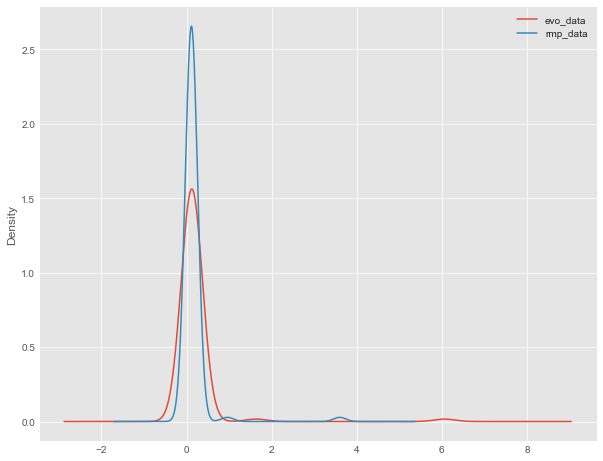

In [18]:
# Plot distributions as overlapping kde plots

kde = data[['evo_data', 'rmp_data']].copy()
kde.plot.kde()
plt.show()

In [19]:
plot1 = data.evo_data
plot2 = data.rmp_data
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
euclidean_distance

0.028284271247461894

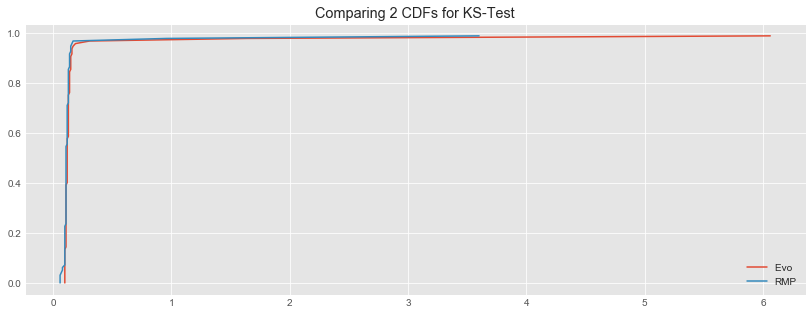

In [20]:
# Plot the CDFs
def ks_plot_comp(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    
    data_2 = data_2
    length = len(data_1)
    plt.figure(figsize=(14, 5))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Evo ', 'RMP'])
    plt.title('Comparing 2 CDFs for KS-Test')
    plt.show()
    
ks_plot_comp(data.evo_data, data.rmp_data)

In [21]:
from scipy import stats 
stats.ks_2samp(data.evo_data, data.rmp_data)

Ks_2sampResult(statistic=0.15463917525773196, pvalue=0.17933412447583871)

In [25]:
# Convert data to numpy arrays and calculate pearson correlation coefficient

x = np.array(data.evo_data)
y = np.array(data.rmp_data)

In [26]:
# Pearson Correlation

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.998


In [27]:
# Effect Size Measurement

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(y,x)
print('Cohens d: %.3f' % d)

Cohens d: -0.084


In [28]:
# Run Independant and dependant t-tests 

from scipy import stats
stats.ttest_ind(y,x)

Ttest_indResult(statistic=-0.58262825704612953, pvalue=0.5608271856537117)

In [29]:
stats.ttest_rel(y,x)

Ttest_relResult(statistic=-1.6203896210431228, pvalue=0.10842894909556224)

In [30]:
# Calculate confusion and matrix and diagnosticsa

EVO=np.hstack(np.array(data['evo_resp']))
RMP=np.hstack(np.array(data['rmp_resp']))

cm = ConfusionMatrix(RMP, EVO)
print(cm)
cm.print_stats()

Predicted   0  1  __all__
Actual                   
0          94  1       95
1           0  2        2
__all__    94  3       97
population: 97
P: 2
N: 95
PositiveTest: 3
NegativeTest: 94
TP: 2
TN: 94
FP: 1
FN: 0
TPR: 1.0
TNR: 0.989473684211
PPV: 0.666666666667
NPV: 1.0
FPR: 0.0105263157895
FDR: 0.333333333333
FNR: 0.0
ACC: 0.989690721649
F1_score: 0.8
MCC: 0.81218786177
informedness: 0.989473684211
markedness: 0.666666666667
prevalence: 0.020618556701
LRP: 95.0
LRN: 0.0
DOR: inf
FOR: 0.0


C:\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


Confusion matrix, without normalization
[[94  1]
 [ 0  2]]


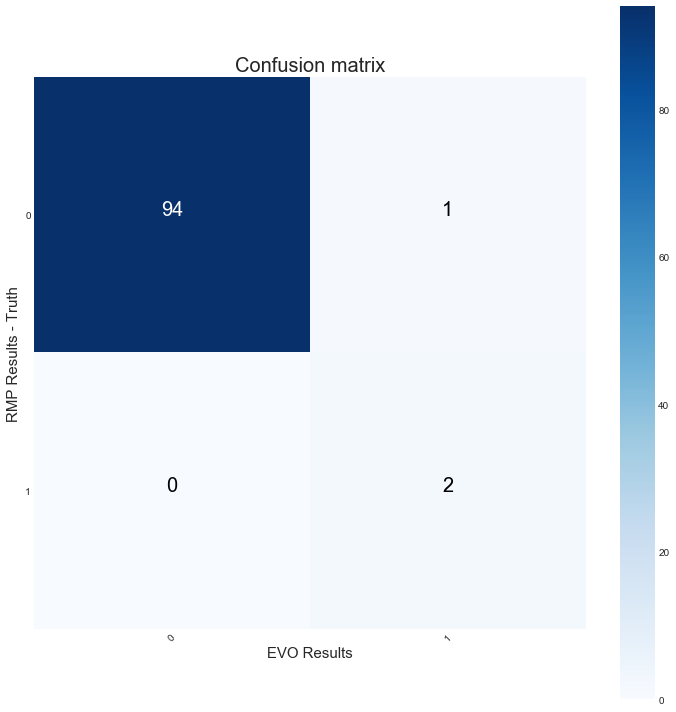

In [35]:
# Draw Confusion matrix for report
# Motivation for this visualization has been taken from stackoverflow discussion at:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets
plt.style.use('seaborn-dark')
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt ), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('RMP Results - Truth', fontsize=15)
    plt.xlabel('EVO Results', fontsize=15)


cm = confusion_matrix(RMP, EVO)

plt.figure()
plot_confusion_matrix(cm, classes = [0,1], title='Confusion matrix')
plt.show()